# 결과 시각화 및 검증

먼저 정확도의 개념을 이해할 필요가 있습니다. 좋은 모델이 되려면 모델이 얼마나 정확해야 할까요? 답은 모델의 사용 사례에 따라 다릅니다. 예를 들어, 막대한 재정적 금액이나 질병 식별과 관련된 모델은 거의 100% 정확도를 가져야 합니다. 이는 모델이 몇 퍼센트만 잘못되었을 경우에도 많은 사람들에게 영향을 미칠 수 있는 중요한 문제가 발생하기 때문입니다. 반면에 영화 추천이나 비디오 추천을 예측하는 경우 잘못된 예측의 영향이 이전에 언급한 시나리오만큼 심각하지 않기 때문에 정확도가 낮더라도 괜찮을 수 있습니다. 또한 100% 정확성을 얻기 위해서는 문제와 관련된 모든 데이터를 수집할 수 있어야 하기 때문에 100% 정확성을 얻는 것은 거의 불가능하다는 점도 이해해야 합니다. 따라서 모델의 정확성과 보유한 데이터의 양 및 사용 사례의 균형을 유지해야 합니다. 그렇다고 낮은 정확도에 만족하고 모델 훈련을 중지해도 괜찮다는 의미는 아닙니다. 지속적으로 여러 방법을 시도하여 정확도를 더 좋게 만들 수 있는지 확인해야 합니다. 많은 방법을 시도했지만 정확도를 향상시킬 수 없는 경우에만 정확도가 사용 사례에 대해 충분히 좋은지 결정할 수 있습니다.

이제 이전 노트북에서 시도한 기계 학습 기술에 대한 시각화 도구를 어떻게 사용할 수 있는지 알아보겠습니다.

In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split # 과대적합을 막는 길 
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn import tree

## 1. K-최근접 이웃 알고리즘(K-Nearest Neighbours)

Iris Flower 데이터 세트에서 KNN 알고리즘을 다시 사용할 것입니다. 데이터 세트를 데이터 프레임 df로 가져오고 데이터 세트를 레이블 인코딩합니다. 레이블 인코딩은 범주를 숫자 그룹으로 변환하는 것입니다. 데이터 클래스를 숫자로 인코딩하는 함수 코드를 작성해 보세요(label_encode). 함수로 작성해두면 노트북에서 필요한 경우 레이블 인코딩 코드를 재사용할 수 있습니다. 이 [문서](https://www.codementor.io/kaushikpal/user-defined-functions-in-python-8s7wyc8k2) 를 읽고 사용자 정의 함수를 작성하는 방법을 알아보세요. 우리가 코드를 작성할 때 함수가 스크립트에서 두 번 이상 사용될 것이라고 생각하면 함수를 작성하는 것이 항상 유용합니다. 데이터 세트를 가져오고 레이블 인코딩을 하려면 아래 코드를 활용하여 작성해보세요.

In [115]:
# Question
def label_encode(df):
    
    return df_labelled

In [116]:
# Answer
def label_encode(df):
    df_labelled = df.copy()
    # 다른 클래스에 대해 다른 숫자를 지정하는 딕셔너리
    label_encode = {"class": {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2}}

    # .replace를 사용하여 서로 다른 클래스를 숫자로 변경
    df_labelled.replace(label_encode,inplace=True)
    return df_labelled

In [117]:
pd.read_csv('./[Dataset]_Module_18_(iris).data')

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


In [118]:
df = pd.read_csv("./[Dataset]_Module_18_(iris).data",header=None)

df.columns = ['sepallength','sepalwidth','petallength','petalwidth','class']
df

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [119]:
features_available = [
    'sepallength','sepalwidth','petallength','petalwidth' 
]
X = df[features_available]
y = df['class']


In [120]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [121]:
X_train
X_test
y_train
y_test = train_test_split
print(X_train)
print(X_test)

     sepallength  sepalwidth  petallength  petalwidth
119          6.0         2.2          5.0         1.5
2            4.7         3.2          1.3         0.2
102          7.1         3.0          5.9         2.1
103          6.3         2.9          5.6         1.8
8            4.4         2.9          1.4         0.2
..           ...         ...          ...         ...
24           4.8         3.4          1.9         0.2
147          6.5         3.0          5.2         2.0
118          7.7         2.6          6.9         2.3
15           5.7         4.4          1.5         0.4
97           6.2         2.9          4.3         1.3

[105 rows x 4 columns]
     sepallength  sepalwidth  petallength  petalwidth
49           5.0         3.3          1.4         0.2
22           4.6         3.6          1.0         0.2
76           6.8         2.8          4.8         1.4
6            4.6         3.4          1.4         0.3
116          6.5         3.0          5.5         1.8
35  

이제 데이터를 훈련 세트와 테스트 세트로 분할하고 데이터도 표준화하십시오. 전체 데이터의 30%를 테스트 데이터 세트로 유지합니다.

In [122]:
df['class'].replace({
    'Iris-virginica': 0,
    'Iris-versicolor': 1,
    'Iris-setosa': 2
}, inplace=True)
df

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,2
1,4.9,3.0,1.4,0.2,2
2,4.7,3.2,1.3,0.2,2
3,4.6,3.1,1.5,0.2,2
4,5.0,3.6,1.4,0.2,2
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


In [123]:
print(X_train.shape)  
print(X_test.shape)   
print(y_train.shape)  
print(y_test.shape)  

(105, 4)
(45, 4)
(105,)


AttributeError: 'function' object has no attribute 'shape'

Train a K-Nearest Neighbours algorithm with the dataset. Remember to use the optimal number of neighbours (6) found in the earlier notebook.
데이터 세트를 사용하여 KNN 알고리즘을 훈련시킵니다. 이전 노트북에서 찾은 최적의 이웃 수(6)를 사용하십시오.

In [124]:
#데이터표준화
from sklearn.preprocessing import StandardScaler

# StandardScaler 객체 생성

scaler = StandardScaler()

# 훈련 세트를 사용하여 평균과 표준 편차를 계산하고 데이터를 표준화
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [125]:
# 각 KNN 모델에 대한 정확도와 이웃 수를 저장하기 위해 빈 목록을 만듭니다.
accuracy = []
num_neigh = []

# ii를 사용하여 값 1에서 15까지 반복합니다. 이것은 KNN 분류기의 이웃 수가 됩니다.
for ii in range(1,16):
    # 이웃 수를 ii로 설정
    KNN = KNeighborsClassifier(n_neighbors=6)
    # 데이터로 모델 훈련 또는 피팅
    KNN.fit(X_train_scale,y_train)
    # .score는 테스트 데이터를 기반으로 모델의 정확도를 제공합니다. 정확도를 목록에 저장합니다.
    y_predict = KNN.predict(X_test_scale) # 추가된 코드
    accuracy.append(KNN.score(X_test_scale)) # 추가된 코드
    # 목록에 이웃 수 추가
    num_neigh.append(6)

accuracy

TypeError: score() missing 1 required positional argument: 'y'

모델의 성능을 평가하려면 먼저 테스트 세트를 기반으로 꽃 유형 또는 클래스를 예측해야 합니다. KNN에서 .predict를 사용하여 테스트 세트를 기반으로 꽃의 종류를 예측합니다. 예측된 값은 y_predict에 저장합니다.

In [126]:
y_predict

array(['Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor'], dtype=object)

우리는 모델의 출력 결과를 평가하는 데 혼동 행렬을 사용할 것입니다. 이 [문서](https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62) 에서 혼동 행렬에 대하여 자세하게 알아보세요. 참 긍정(true positive)은 무엇을 의미합니까? 거짓 부정(False Negative)은 무엇을 의미하나요?

- 참 긍정은 모델이 클래스를 정확하게 예측한 시나리오를 의미합니다.
- 거짓 부정은 모델이 부정적인 결과를 예측했지만 실제 결과는 긍적적인 시나리오를 의미합니다.

위에서 논의한 혼동 행렬은 주로 두 가지 클래스를 분류하는 문제에 사용할 수 있습니다. Iris 데이터 세트의 경우 세개의 서로 다른 클래스(꽃의 유형)를 가지고 있기 때문에 다중 클래스 분류 문제입니다. 다중 클래스에 대한 혼동 행렬은 두 개의 클래스에 대한 혼동 행렬을 확장하여 사용할 수 있습니다. 다중 클래스 혼동 행렬은 모델에 의해 잘못 분류된 클래스를 식별하는 데 도움이 될 수 있습니다. 다중 클래스에 대한 혼동 행렬을 구해 봅시다. 혼동 행렬 함수를 가져오려면 아래 코드를 실행해 보십시오.

In [127]:
from sklearn.metrics import confusion_matrix  

다음으로 예측된 값과 실제 y 값을 혼동 행렬 함수에 넣습니다. 아래 코드를 실행해보세요.

In [128]:
print(confusion_matrix(y_test, y_predict))  

TypeError: Expected sequence or array-like, got <class 'function'>

In [129]:
confusion_matrix(y_test, y_predict)
#     'Iris-virginica': 0,
#     'Iris-versicolor': 1,
#     'Iris-setosa': 2

TypeError: Expected sequence or array-like, got <class 'function'>

모델이 100% 정확하다면 대각선에는 0이 아닌 숫자만 있고, 행렬의 다른 모든 곳에는 0이 있어야 합니다. 행렬의 대각선은 예측 데이터와 실제 데이터가 일치하는 위치입니다. 위 결과 혼동 행렬을 보면 우리는 모델이 매우 정확하고 1개의 데이터 포인트만이 모델에 의해 잘못 분류되었음을 알 수 있습니다. 
- confusion_matrix 함수에 대한 문서를 기반으로 잘못 분류된 포인트를 찾을 수 있습니까? 
- 데이터 포인트의 원래 클래스는 무엇이고 데이터 포인트의 예측 클래스는 무엇이었습니까? 

<font color=blue>힌트: 행은 실제 클래스를 나타내는 반면 열은 예측 클래스를 나타냅니다. </font>

In [130]:
# your answer here

또한 좀 더 이해하기 쉬운 히트맵으로 혼동 행렬을 확인할 수도 있습니다. seaborn 라이브러리를 사용하여 히트맵을 사용할 수 있습니다. seaborn이 가상 환경에 설치되어 있는지 먼저 확인하십시오. 그런 다음 아래 코드를 실행하여 seaborn을 sns로 가져옵니다.

In [131]:
import seaborn as sns
print(confusion_matrix(y_test, y_predict))  

TypeError: Expected sequence or array-like, got <class 'function'>

히트맵을 보려면 아래 코드를 실행하세요.

In [132]:
# 새 데이터 프레임 생성
df = pd.DataFrame()

# 데이터 프레임 내에서 새 열 만들기
df['Actual'] = y_test
df['Predicted'] = y_predict

# pd.crosstab을 사용하여 실제 및 예측된 클래스의 빈도 계산
freq = pd.crosstab(df.Actual,df.Predicted)

# sns.heatmap을 사용하여 히트맵 그리기
sns.heatmap(freq,annot=True,fmt="d")

ValueError: zero-size array to reduction operation fmin which has no identity

## 2. 의사 결정 트리(Decision Tree)

이제 의사 결정 트리에 동일한 방법을 적용해 봅시다. 먼저 max_depth=2와 min_samples_split=6을 사용하여 동일한 데이터 세트에 대한 의사 결정 트리를 훈련합니다. max_depth와 min_samples_split이 무엇을 의미하는지 기억하십니까? max_depth 및 min_Samples_split에 대한 자세한 내용은 이전 노트북(Model_Outputs)을 참조하세요.

In [133]:
dt = tree.DecisionTreeClassifier(max_depth=2, min_samples_split=6 )
    # 데이터로 모델 훈련 또는 피팅
dt.fit(X_train_scale,y_train)

DecisionTreeClassifier(max_depth=2, min_samples_split=6)

In [134]:
decision_tree_classifier = DecisionTreeClassifier(max_depth=2, min_samples_split=6)
decision_tree_classifier.fit(x_train_scale, y_train)
y_predict_decision_tree = decision_tree_classifier.predict(x_test_scale)
print(confusion_matrix(y_test, y_predict_decision_tree))  

NameError: name 'DecisionTreeClassifier' is not defined

In [135]:
accuracy = []
depth = []

# ii를 사용하여 값 1에서 9까지 반복합니다. 이것은 의사결정 트리의 max_depth 값이 됩니다.
for ii in range(1,9):
    # max_depth를 ii로 설정
    dt = tree.DecisionTreeClassifier(max_depth=ii)
    # 데이터로 모델 훈련 또는 피팅
    dt.fit(X_train_scale,y_train)
    # .score는 테스트 데이터를 기반으로 모델의 정확도를 제공합니다. 정확도를 목록에 저장합니다.
    accuracy.append(dt.score(X_test_scale,y_test))
    # 목록에 max_depth 값 추가
    depth.append(ii)

accuracy

TypeError: Expected sequence or array-like, got <class 'function'>

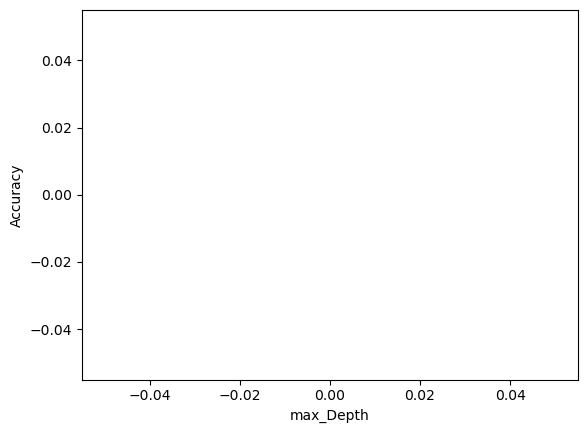

In [137]:
plt.scatter(depth,accuracy)
plt.xlabel('max_Depth')
plt.ylabel('Accuracy')
plt.show();

In [138]:
accuracy = []
split_values = []

for split_value in range(2, 7):
    # min_samples_split 값을 split_value로 설정
    dt = tree.DecisionTreeClassifier(min_samples_split=split_value)
    # 모델을 훈련
    dt.fit(X_train_scale, y_train)
    # 정확도를 계산하여 목록에 저장
    accuracy.append(dt.score(X_test_scale, y_test))
    # min_samples_split 값을 목록에 저장
    split_values.append(split_value)

TypeError: Expected sequence or array-like, got <class 'function'>

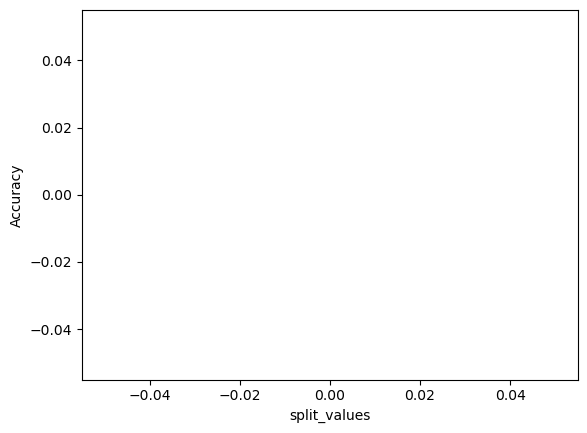

In [139]:
plt.scatter(split_values,accuracy)
plt.xlabel('split_values')
plt.ylabel('Accuracy')
plt.show();

x_test_scale 값을 사용하여 클래스를 예측합니다.

In [82]:
predicted_classes = dt.predict(X_test_scale)


print(predicted_classes)

['Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor']


In [106]:
import seaborn as sns
print(confusion_matrix(y_test, y_predict))  

TypeError: Expected sequence or array-like, got <class 'function'>

혼동 행렬을 구하고 출력합니다.

In [17]:
# Your code here

[[14  0  0]
 [ 0 17  0]
 [ 0  1 13]]


- 잘못된 데이터 분류가 있습니까? 
- 몇 포인크가 잘못 분류되었습니까? 
- 잘못 분류된 포인트의 실제 클래스와 예측 클래스는 무엇이었습니까?

In [ ]:
# your answer here

이 혼동 행렬에 대한 히트맵을 그려봅니다.

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

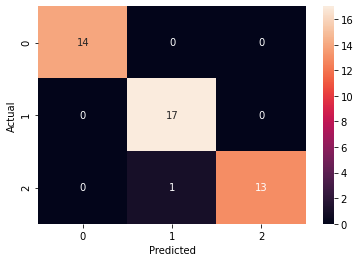

In [18]:
# Your code here

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

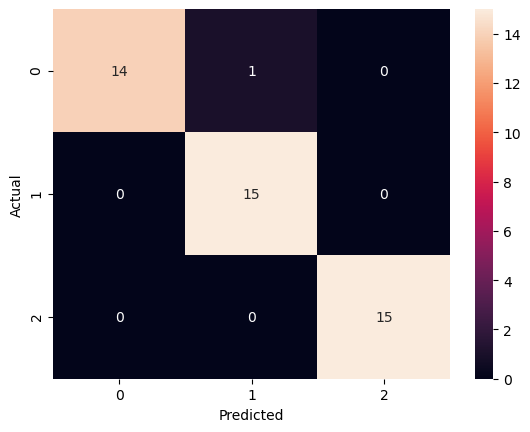

In [61]:
# 새 데이터 프레임 생성
df = pd.DataFrame()

# 데이터 프레임 내에서 새 열 만들기
df['Actual'] = y_test
df['Predicted'] = y_predict

# pd.crosstab을 사용하여 실제 및 예측된 클래스의 빈도 계산
freq = pd.crosstab(df.Actual,df.Predicted)

# sns.heatmap을 사용하여 히트맵 그리기
sns.heatmap(freq,annot=True,fmt="d")

KNN과 의사결정트리의 혼동 행렬을 비교하여 Iris flower 데이터 세트의 분류 문제에 대해 더 나은 모델은 무엇이라고 생각합니까? 왜 더 나은 모델입니까? 다른 학생들과 토론하고 아래에 답을 나열하세요.

In [ ]:
# your answer here

또한 정확도가 비슷할 때 고려해야 할 다른 측정 지표도 있습니다. 대표적인 측정 지표로 정밀도(precision), 재현율(recall) 및 F1 점수가 있습니다. 측정 지표에 대한 자세한 내용은 이 [링크](https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9) 와 이 [링크](https://medium.com/@raghaviadoni/evaluation-metrics-i-precision-recall-and-f1-score-3ec25e9fb5d3) 를 참조하십시오. 이러한 측정 지표를 사용하여 모델을 어떻게 결정하시겠습니까?

In [ ]:
# your answer here

모델을 결정한 후 모델을 사용하여 새로 수집된 데이터의 꽃 유형을 식별할 수도 있습니다. 예를 들어, 친구가 일부 꽃의 꽃받침 길이, 꽃받침 너비, 꽃잎 길이 및 꽃잎 너비를 측정하여 "iris_predict.data"라는 파일에 데이터를 저장했다고 가정해 봅시다. 친구는 측정된 값을 기반으로 이 꽃의 종류를 찾고 싶어합니다. 친구를 도와주기 위해 여러분의 모델을 사용할 수 있습니까? 친구가 측정한 꽃의 종류는 무엇입니까?
<font color=blue>힌트: 이전에 .predict 메서드를 사용하여 테스트 케이스의 꽃 유형을 구분한 것을 기억하십니까? 친구를 위해 꽃 종류를 구분하기 의해 동일하게 수행할 수 있습니다. 또한 꽃 종류를 찾기 전에 데이터의 척도를 조정해야 합니다. </font>

In [23]:
# Your code here

In [24]:
# Your code here

In [25]:
# Your code here

In [26]:
# Your code here

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 1 2 2 2 2 2 2 2 2 2
 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 1 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
# your answer here